In [1]:
import torch
import numpy as np
from sklearn import datasets

X_numpy, Y_numpy = datasets.make_regression(n_samples=100,
                                            n_features=1,
                                            noise=20,
                                            random_state=12)

# 将numpy 的数据类型转成tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(Y_numpy.astype(np.float32))
print(X.shape, Y.shape)

# 对Y进行格式统一
Y = Y.view(100, 1)
print(X.shape, Y.shape)

n_samples, in_features = X.shape  # 行、列分别作为样本个数，特征个数
n_lables, out_features = Y.shape  # 行、列为标记个数，1或多个值（类别）

print(n_samples, in_features)
print(n_lables, out_features)


torch.Size([100, 1]) torch.Size([100])
torch.Size([100, 1]) torch.Size([100, 1])
100 1
100 1


### 课堂练习2-7

利用pytorch定义神经网络类

In [2]:
# 搭建自己的神经网络,并创建模型对象
class MyModel(torch.nn.Module):
    # 初始化函数的定义，定义神经网络和参数
    def __init__(self, in_features_len, out_features_len) -> None:  # -> 后面是返回类型
        super(MyModel, self).__init__()
        # 构建线性层
        self.linear = torch.nn.Linear(in_features_len, out_features_len)

    # 向前传播，构建计算图
    def forward(self, x):
        """重写了父类的forward函数，正向传播"""
        out = self.linear(x)
        return out

In [3]:
model = MyModel(in_features, out_features)

# 2.定义损失（代价）函数loss
lossF = torch.nn.MSELoss()

# 3. 定义优化器optimizer,利用其管理模型参数
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.0954]], requires_grad=True), Parameter containing:
tensor([-0.9669], requires_grad=True)]


In [4]:
import matplotlib.pyplot as plt

# 模型训练
n_iters = 30

for epoch in range(n_iters):
    # 4. 通过model(X) 调用forward，进行前向传播
    pred = model(X)
    # 5. 利用loss(Y, y_pre)计算模型的损失
    l = lossF(Y, pred)
    #6. 利用loss.backward() 进行向后传播，计算模型的梯度
    l.backward()
    # 7. 利用optimizer.step() 更新权重
    optimizer.step()
    # 8. 利用optimizer.zero_grad() 清空梯度
    optimizer.zero_grad()
    # 打印结果
    if epoch % 2 == 0:
        w, b = model.parameters()
        print(f"loss={l.item():.8f},w={w.item():.4f},b = {b.item()}")


loss=2048.13354492,w=8.6688,b = -2.190110683441162
loss=991.04388428,w=20.4232,b = -3.314948797225952
loss=616.27111816,w=27.4789,b = -3.50077486038208
loss=480.81066895,w=31.7363,b = -3.2987165451049805
loss=430.76351929,w=34.3197,b = -2.975449323654175
loss=411.82714844,w=35.8963,b = -2.650707960128784
loss=404.48281860,w=36.8643,b = -2.370842218399048
loss=401.56402588,w=37.4623,b = -2.147434711456299
loss=400.37707520,w=37.8341,b = -1.9770485162734985
loss=399.88430786,w=38.0666,b = -1.850939393043518
loss=399.67602539,w=38.2129,b = -1.7595415115356445
loss=399.58673096,w=38.3055,b = -1.6943109035491943
loss=399.54797363,w=38.3645,b = -1.6482930183410645
loss=399.53094482,w=38.4022,b = -1.6161192655563354
loss=399.52343750,w=38.4265,b = -1.5937830209732056


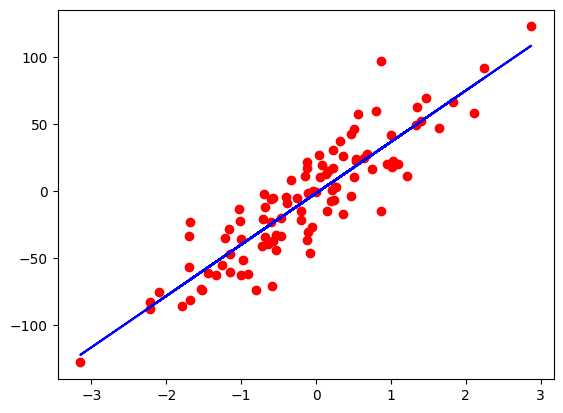

In [5]:
with torch.no_grad():
    predicted = model(X).numpy()

plt.plot(X_numpy, Y_numpy, "ro")
plt.plot(X_numpy, predicted, "b")
plt.show()


In [24]:
# 修改神经网络，增加多个神经元，神经元之间加入激活函数
class NeuralNet(torch.nn.Module):
    def __init__(self,input_size, out_size):
        super(NeuralNet, self).__init__()
        self.linear1 = torch.nn.Linear(input_size,10)
        self.linear2 = torch.nn.Linear(10,30)
        self.linear3 = torch.nn.Linear(30, 50)
        self.linear4 = torch.nn.Linear(50, 30)
        self.linear5 = torch.nn.Linear(30, 10)
        self.linear6 = torch.nn.Linear(10, out_size)
        self.relu = torch.nn.ReLU()

    def forward(self,x):
        out = self.relu(self.linear1(x))
        out = self.relu(self.linear2(out))
        out = self.relu(self.linear3(out))
        
        out = self.relu(self.linear4(out))
        out = self.relu(self.linear5(out))
        
        out = self.linear6(out)
        return out

model = NeuralNet(in_features, out_features)
# model = NeuralNet(1,20,1)

# 2.定义损失（代价）函数loss
lossF = torch.nn.MSELoss()

# 3. 定义优化器optimizer,利用其管理模型参数
optimizer = torch.optim.SGD(model.parameters(), lr=0.00001)
print(list(model.parameters()))


[Parameter containing:
tensor([[-0.3599],
        [-0.9878],
        [-0.9141],
        [ 0.8038],
        [-0.6609],
        [-0.3404],
        [-0.2762],
        [-0.4803],
        [ 0.1101],
        [ 0.4619]], requires_grad=True), Parameter containing:
tensor([ 0.4294,  0.4790, -0.6845, -0.6665, -0.8636, -0.9333,  0.5510, -0.6696,
         0.3227, -0.4692], requires_grad=True), Parameter containing:
tensor([[-0.1539,  0.1816,  0.0183,  0.3126, -0.0086, -0.2359, -0.2832,  0.1110,
         -0.1972,  0.2007],
        [-0.0307,  0.1936, -0.2171, -0.0261, -0.0427,  0.0046, -0.2847,  0.1294,
         -0.0098, -0.1620],
        [-0.1593,  0.2531, -0.2794,  0.2516, -0.2275,  0.2772,  0.2639, -0.1344,
         -0.0515, -0.1920],
        [-0.0239, -0.1786, -0.0025, -0.2609,  0.0269, -0.0867, -0.0392,  0.2245,
          0.2686,  0.0255],
        [ 0.0366, -0.2931,  0.2788,  0.1589,  0.2226,  0.0600,  0.0961, -0.0057,
         -0.1625, -0.2423],
        [-0.2086, -0.1529, -0.2551, -0.1345,  0.

In [25]:
import matplotlib.pyplot as plt

# 模型训练
n_iters = 200000 #30

for epoch in range(n_iters):
    # 4. 通过model(X) 调用forward，进行前向传播
    pred = model(X)
    # 5. 利用loss(Y, y_pre)计算模型的损失
    l = lossF(Y, pred)
    #6. 利用loss.backward() 进行向后传播，计算模型的梯度
    l.backward()
    # 7. 利用optimizer.step() 更新权重
    optimizer.step()
    # 8. 利用optimizer.zero_grad() 清空梯度
    optimizer.zero_grad()
    # 打印结果
    if epoch % 5000 == 0:
        # w, b = model.parameters()
        print(f"loss={l.item():.8f}")


loss=2071.14916992
loss=2028.10620117
loss=983.94696045
loss=424.02941895
loss=386.86700439
loss=382.95187378
loss=381.42608643
loss=379.90682983
loss=378.66156006
loss=377.34738159
loss=376.16467285
loss=375.19619751
loss=374.37084961
loss=373.61575317
loss=372.82467651
loss=371.95568848
loss=370.88131714
loss=369.56570435
loss=367.87341309
loss=365.69909668
loss=363.07296753
loss=360.02920532
loss=356.35348511
loss=352.17575073
loss=344.63195801
loss=342.76110840
loss=342.59899902
loss=338.50360107
loss=325.96163940
loss=333.72445679
loss=328.49618530
loss=317.48187256
loss=322.16409302
loss=316.72546387
loss=332.74194336
loss=312.77087402
loss=303.56152344
loss=316.72583008
loss=324.07284546
loss=318.68566895


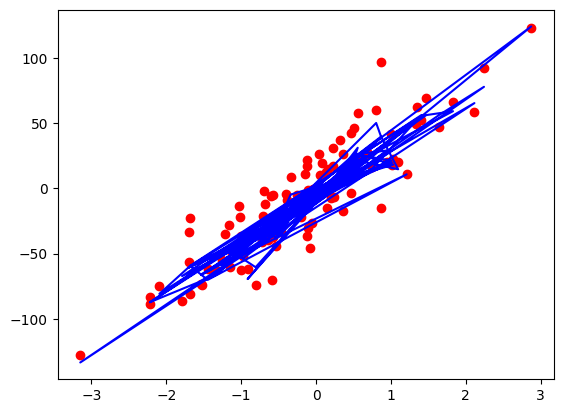

In [26]:
with torch.no_grad():
    predicted = model(X).numpy()

plt.plot(X_numpy, Y_numpy, "ro")
plt.plot(X_numpy, predicted, "b")
plt.show()


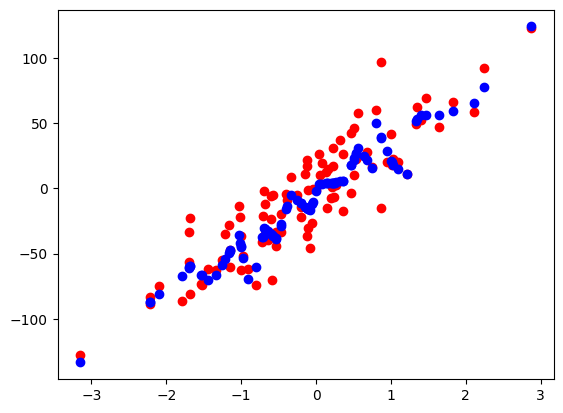

In [27]:
plt.scatter(X_numpy,Y_numpy,c="red")
plt.scatter(X_numpy,predicted,c="blue")
plt.show()